## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [1]:
!pip install nlp

     ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
      --------------------------------------- 0.0/1.7 MB 660.6 kB/s eta 0:00:03
      --------------------------------------- 0.0/1.7 MB 660.6 kB/s eta 0:00:03
      --------------------------------------- 0.0/1.7 MB 178.6 kB/s eta 0:00:10
      --------------------------------------- 0.0/1.7 MB 178.6 kB/s eta 0:00:10
      --------------------------------------- 0.0/1.7 MB 178.6 kB/s eta 0:00:10
     ---- ----------------------------------- 0.2/1.7 MB 551.6 kB/s eta 0:00:03
     ---------- ----------------------------- 0.4/1.7 MB 1.3 MB/s eta 0:00:01
     ------------------ --------------------- 0.8/1.7 MB 1.9 MB/s eta 0:00:01
     ------------------------- -------------- 1.0/1.7 MB 2.4 MB/s eta 0:00:01
     --------------------------------- ------ 1.4/1.7 MB 2.8 MB/s eta 0:00:01
     ---------------------------------------  1.6/1.7 MB 3.2 MB/s 

In [2]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.14.0


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [3]:
import pandas as pd
import os

#!rm merged_training.pkl


In [4]:
df = pd.read_pickle("merged_training.pkl")
from sklearn.model_selection import train_test_split
#df = df.sample(frac=1).reset_index(drop=True)


In [38]:

 X_train, y_train,X_test, y_test = train_test_split(df.text,df.emotions ,test_size=0.01, random_state=42)

In [41]:
X_test



14045        anger
31774         fear
104340     sadness
135133         joy
15201        anger
            ...   
12409         love
6806         anger
7037      surprise
28139        anger
12025     surprise
Name: emotions, Length: 412640, dtype: object

## Task 4: Tokenizer

1. Tokenizing the tweets

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [22]:
tokenizer = Tokenizer(num_words = 10000,oov_token="<UNK>")
tokenizer.fit_on_texts(X_train)

In [26]:
tokenizer.texts_to_sequences(X_train)

[[2, 3, 1, 4, 1050],
 [2, 1158, 9, 2, 803, 5, 3, 643, 4, 2974, 4, 430, 2561, 10, 567, 17, 341, 30],
 [2, 21, 42, 36, 225, 8, 150, 758, 4, 5099],
 [17, 32, 8, 2031, 851, 10, 79, 111, 59],
 [2, 3, 29, 138, 62, 46, 497, 45, 11, 1458, 4, 46, 95, 935, 5, 27, 497],
 [17,
  8,
  582,
  4,
  793,
  4,
  1468,
  5,
  99,
  148,
  25,
  140,
  1043,
  10,
  9758,
  7724,
  5,
  89,
  11,
  181,
  1,
  5,
  1,
  1881,
  7272,
  5,
  881,
  115,
  325,
  2690,
  3800],
 [2, 3, 592, 149, 1012, 188, 149, 11, 3284, 516, 19],
 [2,
  3,
  81,
  550,
  5,
  44,
  121,
  4130,
  26,
  9,
  6,
  2428,
  129,
  186,
  27,
  6,
  4130,
  10,
  6,
  4477],
 [2, 64, 116, 11, 1195, 3, 133, 180],
 [2, 41, 103, 36, 23, 845, 5, 3, 23, 151],
 [2, 41, 3, 695, 4, 47, 3300, 4, 63, 46, 498, 2084, 521, 5, 6, 1304],
 [2, 3, 4, 312, 54, 2, 160, 1061, 157, 466],
 [2,
  3,
  532,
  5,
  1216,
  154,
  69,
  1,
  16,
  63,
  46,
  595,
  9,
  2618,
  57,
  787,
  7,
  155,
  10,
  3946,
  1,
  4,
  533,
  965,
  12,
  109,


## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

In [27]:
lengths = [len(t.split(' ')) for t in X_train[:]]

(array([1.2150e+03, 1.9995e+04, 3.0518e+04, 3.1880e+04, 3.3053e+04,
        3.3366e+04, 3.2363e+04, 3.0618e+04, 2.8382e+04, 2.5959e+04,
        2.3040e+04, 2.0202e+04, 2.5443e+04, 1.3712e+04, 1.1303e+04,
        9.6150e+03, 8.0200e+03, 6.5580e+03, 5.5070e+03, 4.5780e+03,
        3.7400e+03, 3.1460e+03, 2.5310e+03, 2.1140e+03, 2.4860e+03,
        1.2430e+03, 8.6500e+02, 5.3600e+02, 3.3800e+02, 1.7100e+02,
        7.2000e+01, 3.3000e+01, 1.8000e+01, 3.0000e+00, 2.0000e+00,
        4.0000e+00, 3.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

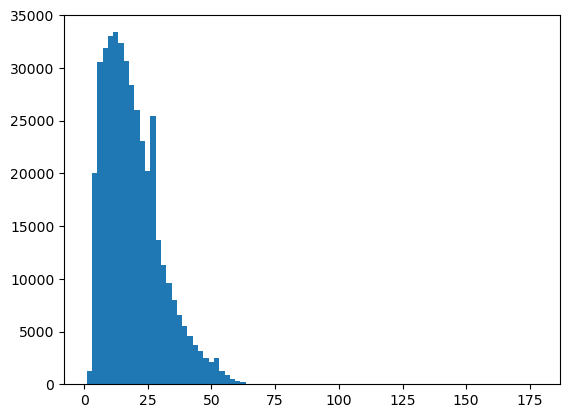

In [28]:
plt.hist(lengths, bins = len(set(lengths)))

In [29]:
maxlen = 50
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [30]:
def get_sequences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating='post', padding = 'post', maxlen = maxlen)
  return padded

In [31]:
padded_train_seq = get_sequences(tokenizer,X_train)

In [32]:
padded_train_seq.shape


(412640, 50)

In [37]:
y_train.shape

(412640,)

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

{'joy', 'anger', 'sadness', 'fear', 'love', 'surprise'}


(array([ 56731.,      0.,  47226.,      0., 119979.,      0., 139649.,
             0.,  14816.,  34239.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

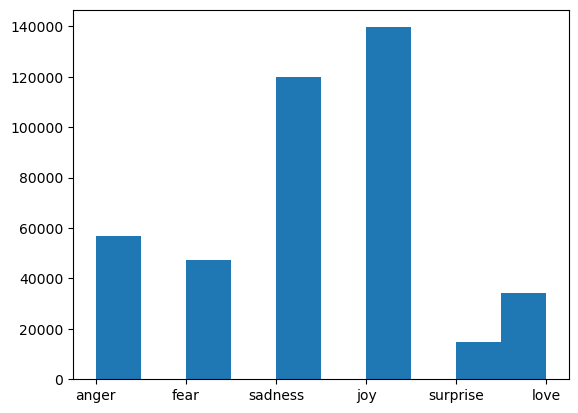

In [42]:
classes  = set(X_test)
print(classes)
plt.hist(X_test)

In [43]:
class_to_index = dict((c,i) for i,c in enumerate(classes))
index_to_class = dict((v,k) for k,v in class_to_index.items())

In [44]:
names_to_ids = lambda labels: np.array([class_to_index.get(x) for x in labels])

In [45]:
train_labels = names_to_ids(X_test)


In [46]:
train_labels

array([1, 3, 2, ..., 5, 1, 5])

## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [47]:
from keras.src.layers.rnn.lstm import LSTM
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000,16,input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(40,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6,activation = 'softmax')
])

In [48]:
model.compile(

    loss='sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics=['accuracy']

)

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            160000    
                                                                 
 bidirectional (Bidirection  (None, 50, 80)            18240     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 40)                16160     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 194646 (760.34 KB)
Trainable params: 194646 (760.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [51]:
val_seq = get_sequences(tokenizer,y_train[:])
val_labels = names_to_ids(y_test)

In [52]:
val_labels.shape

(4169,)

In [54]:
h = model.fit(
    padded_train_seq, train_labels,
    validation_data = (val_seq,val_labels),
    epochs = 10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)

Epoch 1/10
12895/12895 [==============================] - 313s 24ms/step - loss: 0.1533 - accuracy: 0.9259 - val_loss: 0.1259 - val_accuracy: 0.9350
Epoch 2/10
12895/12895 [==============================] - 308s 24ms/step - loss: 0.0988 - accuracy: 0.9384 - val_loss: 0.0915 - val_accuracy: 0.9420
Epoch 3/10
12895/12895 [==============================] - 315s 24ms/step - loss: 0.0932 - accuracy: 0.9406 - val_loss: 0.0926 - val_accuracy: 0.9412
Epoch 4/10
12895/12895 [==============================] - 311s 24ms/step - loss: 0.0898 - accuracy: 0.9414 - val_loss: 0.0902 - val_accuracy: 0.9388


In [55]:
val_labels.shape


(4169,)

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

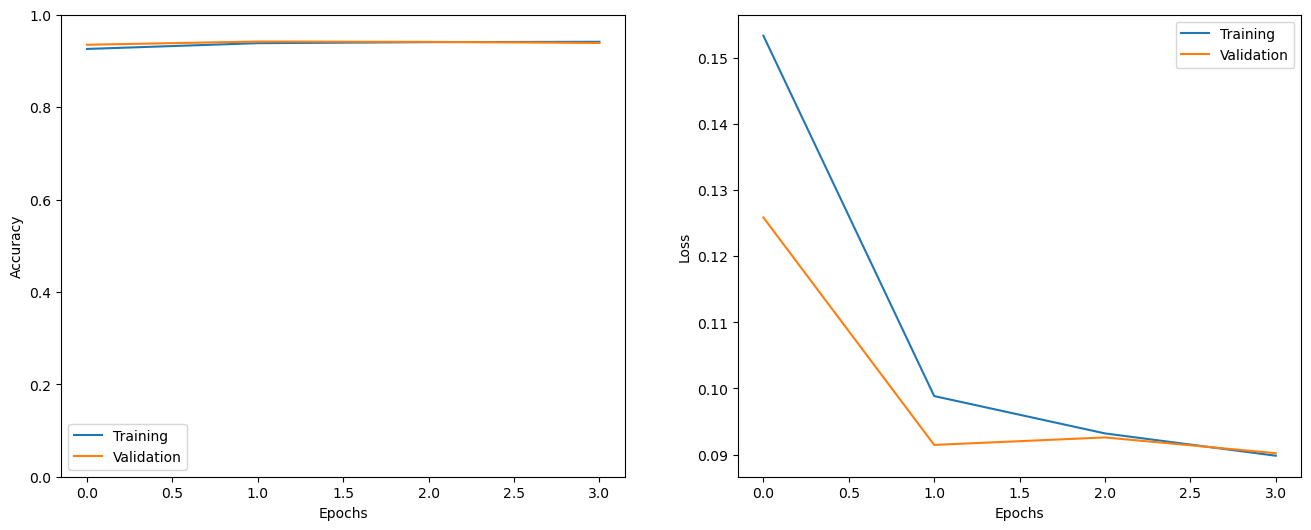

In [56]:
show_history(h)

In [60]:
test_seq = get_sequences(tokenizer,test.text)
test_labels = names_to_ids(test.emotions)

In [61]:
_=model.evaluate(test_seq,test_labels)

63/63 [==============================] - 1s 10ms/step - loss: 0.0831 - accuracy: 0.9425


63/63 [==============================] - 2s 10ms/step


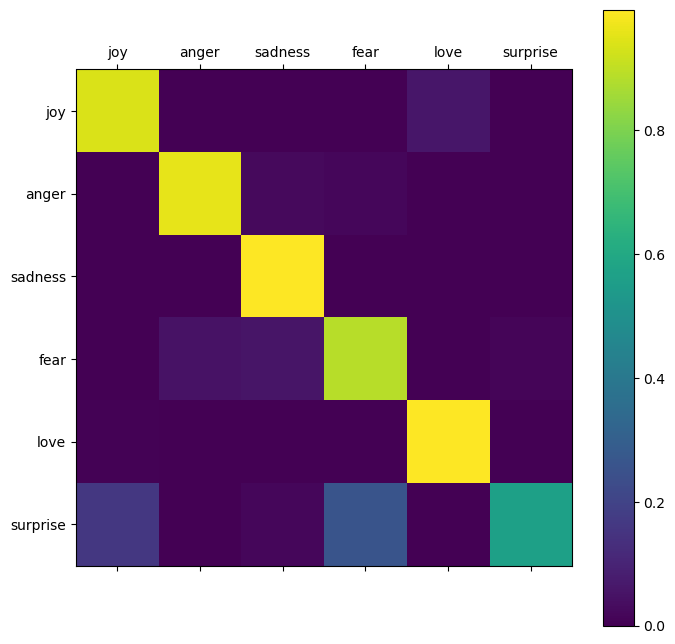

In [62]:
preds = model.predict(test_seq)
predicted_classes = preds.argmax(axis=-1)
show_confusion_matrix(test_labels,predicted_classes,list(classes))

In [63]:
from sklearn.metrics import f1_score
score = f1_score(test_labels,predicted_classes,average='weighted')

In [64]:
score

0.9414367833124814